### Grace George

# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

## Question 1

In [64]:
import plotly.express 

In [65]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

In [66]:
iowa= pd.read_csv('/Users/graceegeorge/DS5030_public_repo/data/iowa.csv')
iowa

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159899,INV-20689000058,07/17/2019,2565,HY-VEE FOOD STORE #1636 / SPENCER,51301,AMERICAN CORDIALS & LIQUEURS,LUXCO INC,76488,PARAMOUNT AMARETTO,1750,8.07,12.11,6,72.66
159900,S05071400061,04/16/2012,3583,MAC'S LIQUOR AND VIDEOS,50060,COFFEE LIQUEURS,PERNOD RICARD USA/AUSTIN NICHOLS,67527,KAHLUA COFFEE LIQUEUR,1000,14.81,22.22,1,22.22
159901,INV-22880300009,10/29/2019,3896,SMOKIN' JOE'S #18 TOBACCO AND LIQUOR OUTLET,52240,IMPORTED DRY GINS,DIAGEO AMERICAS,28866,TANQUERAY GIN,750,13.50,20.25,2,40.50
159902,INV-58180900067,05/05/2023,4057,TEQUILA'S LIQUOR STORE,50316,NEUTRAL GRAIN SPIRITS FLAVORED,OLE SMOKY DISTILLERY LLC,80363,OLE SMOKY BANANA PUDDING CREAM MOONSHINE,750,13.00,19.50,3,58.50


I found the profit by subtracting gthe state bottle cost from the reatil cost and mutilplying that by the bottles sold.

In [67]:
iowa['Profit']=(iowa["State Bottle Retail"]- iowa["State Bottle Cost"]).mul(iowa["Bottles Sold"])
iowa["Profit"]

0         18.10
1         29.04
2         46.80
3         47.28
4         15.00
          ...  
159899    24.24
159900     7.41
159901    13.50
159902    19.50
159903    20.76
Name: Profit, Length: 159904, dtype: float64

In [68]:
iowa_sum=iowa.groupby("Item Description").sum()
iowa_sum=iowa_sum.sort_values(ascending=False,by="Profit")

In [69]:
iowa_graph=px.scatter(iowa_sum[0:5],y="Profit",title="Top 5 Profitable Liquors")
iowa_graph

## Question 2

2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(-1,1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(1,-1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

In [70]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])
## np.subtract(x,y)

The vectors x and y could not be subtracted because they have different sizes.

In [71]:
x_reshape= x.reshape(-1,1)
print(x_reshape)
y_reshape= y.reshape(1,-1)
print(y_reshape)
diff=np.subtract(x_reshape,y_reshape)
diff


[[1]
 [3]
 [5]]
[[2 5]]


array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

We get a  3 x 2 array.

In [72]:
print(x.reshape(1,-1))
print(y.reshape(-1,1))
np.subtract(x.reshape(1,-1),y.reshape(-1,1))

[[1 3 5]]
[[2]
 [5]]


array([[-1,  1,  3],
       [-4, -2,  0]])

Used chatGPT for help

In [73]:
matrix=np.empty((len(x),len(y)))
for ix, i in enumerate(x):
    for iy, j in enumerate(y):
        num=i-j
        matrix[ix,iy]=num  
matrix               

array([[-1., -4.],
       [ 1., -2.],
       [ 3.,  0.]])

In [74]:
matrix=np.empty((len(y),len(x)))
for iy, j in enumerate(y):
    for ix, i in enumerate(x):
        num=j-i
        matrix[iy,ix]=num  
matrix               

array([[ 1., -1., -3.],
       [ 4.,  2.,  0.]])

## Question 3

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ is false and 1 if $x \le z$ is true.

- For $y = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition that
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

In [75]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<class 'range'>
(array([0.2, 0.4, 0.6, 0.8, 1. ]), array([-1.15754965, -0.96138264,  0.2897558 ,  0.54397364,  0.78085407]))


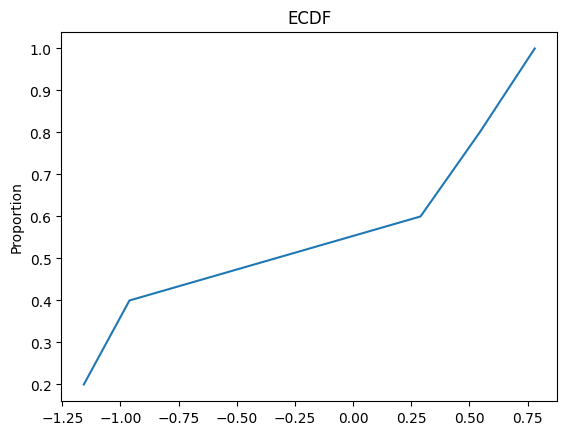

In [76]:


rng = np.random.default_rng(100)
print(range)
X = rng.normal(0,1,5)

def ecdf(x,plot=True):
    grid = np.sort(np.unique(X))
    ecdf = np.zeros(len(grid))
    for idx in range(len(grid)):
        ecdf[idx] = (X <= grid[idx]).sum()/len(X)
    if plot:
        plt.plot(grid,ecdf)
        plt.title("ECDF")
        plt.ylabel("Proportion")
    return ecdf,grid


print(ecdf(X))

In [77]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

for N in (3,30,300,3000):
    X = rng.normal(0,1,N)
    

    # ECDF plot goes here:


## Question 4

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [78]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])
## np.subtract(x,y)

### Quantile

In [79]:
def find_quantile(x,q):
    value,grid=ecdf(x,plot=False)
    # Compute the difference
    difference=q-value
    abs_difference=np.abs(difference)
    smallest_diff=np.min(abs_difference)
    index=np.where(abs_difference==smallest_diff)
    quantile=grid[index]
    return quantile
        






### Boxplot

In [80]:
def find_box_plot(x):
    first_quartile=find_quantile(x,.25)
    third_quartile=find_quantile(x,.75)
    IQR= third_quartile-first_quartile
    whisker2= third_quartile+(1.5 * IQR) 
    whisker1=first_quartile-(1.5 * IQR)  
    median=find_quantile(x,0.50)
    max=np.max(x)
    min=np.min(x)
    return {
        "whisker1": whisker1,
        "whisker2": whisker2,
        "IQR":IQR,
        "Quartile 1": first_quartile,
        "Median": median,
        "Quartile 3": third_quartile,
        "Minimum": min,
        "Maximum": max
    }

In [81]:
find_box_plot(x=iowa["Bottles Sold"])

{'whisker1': array([-2.66753485]),
 'whisker2': array([2.74146942]),
 'IQR': array([1.35225107]),
 'Quartile 1': array([-0.63915825]),
 'Median': array([0.02911646]),
 'Quartile 3': array([0.71309282]),
 'Minimum': -60,
 'Maximum': 2400}

count    159904.000000
mean         10.883336
std          28.042635
min         -60.000000
25%           3.000000
50%           6.000000
75%          12.000000
max        2400.000000
Name: Bottles Sold, dtype: float64

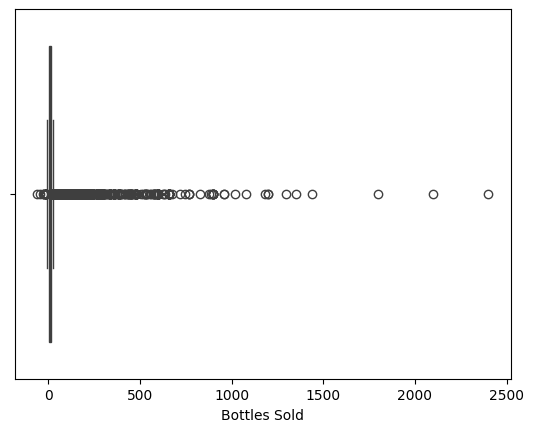

In [82]:
sns.boxplot(x=iowa["Bottles Sold"])
iowa["Bottles Sold"].describe()

My answers are different than the .describe function for Q1 and Q2. I don't know why this. This function was corect with other data sets.

### Outliers

In [83]:
def is_outlier(point,data):
    stats=find_box_plot(data)
    if point< stats["whisker2"] or point> stats["whisker1"]:
      print(point, "is an outlier!")
    else:
       print(point, "is not an outlier!")
        


  

In [84]:
is_outlier(12,iowa["Bottles Sold"])

12 is an outlier!


## Question 5

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?